In [1]:
!pip install opencv-python
!pip install tensor flow
!pip install numpy
!pip install pandas
!pip install keras
!pip install adam
!pip install kwargs
!pip install cinit

  Using cached tensor-0.3.6.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flow-0.1.2.tar.gz (139 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [10 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\House of Musa\AppData\Local\Temp\pip-install-5uuenbz6\flow_8c763b66cf79425cb77e2c55f914d8c4\setup.py", line 35, in <module>
      long_description = f.read()
                         ^^^^^^^^
    File "D:\Users\House of Musa\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2601: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating pac

ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs


In [2]:
import sys, os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils
from keras.utils import to_categorical

In [3]:
df = pd.read_csv(r'D:\data\EEC\EEC dataset\fer2013.csv')

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
print(df.info())
print(df["Usage"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [6]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [7]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [8]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [9]:
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

In [10]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [11]:
#1st convolution layer

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [12]:
#2nd convolution layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [13]:
#3rd Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

In [14]:
#Fully connected neural network
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
# model.summary()

In [15]:
#Training

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils

In [16]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_20304\4198441462.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)


Epoch 1/30
64/64 [==============================] - 54s 677ms/step - loss: 1.8332 - accuracy: 0.2234
Epoch 2/30
64/64 [==============================] - 54s 841ms/step - loss: 1.7806 - accuracy: 0.2542
Epoch 3/30
64/64 [==============================] - 52s 807ms/step - loss: 1.7428 - accuracy: 0.2870
Epoch 4/30
64/64 [==============================] - 50s 787ms/step - loss: 1.7142 - accuracy: 0.3149
Epoch 5/30
64/64 [==============================] - 46s 721ms/step - loss: 1.6308 - accuracy: 0.3391
Epoch 6/30
64/64 [==============================] - 39s 603ms/step - loss: 1.6139 - accuracy: 0.3615
Epoch 7/30
64/64 [==============================] - 38s 595ms/step - loss: 1.5890 - accuracy: 0.3784
Epoch 8/30
64/64 [==============================] - 45s 703ms/step - loss: 1.5480 - accuracy: 0.3911
Epoch 9/30
64/64 [==============================] - 38s 593ms/step - loss: 1.5158 - accuracy: 0.4031
Epoch 10/30
64/64 [==============================] - 43s 678ms/step - loss: 1.4757 - accura

In [17]:
#Method 2 Compiling the model

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
449/449 [==============================] - 210s 466ms/step - loss: 1.2695 - accuracy: 0.5135 - val_loss: 1.2435 - val_accuracy: 0.5294
Epoch 2/30
449/449 [==============================] - 220s 491ms/step - loss: 1.2362 - accuracy: 0.5238 - val_loss: 1.2233 - val_accuracy: 0.5358
Epoch 3/30
449/449 [==============================] - 220s 489ms/step - loss: 1.2086 - accuracy: 0.5377 - val_loss: 1.2278 - val_accuracy: 0.5274
Epoch 4/30
449/449 [==============================] - 217s 483ms/step - loss: 1.1879 - accuracy: 0.5445 - val_loss: 1.1942 - val_accuracy: 0.5422
Epoch 5/30
449/449 [==============================] - 216s 481ms/step - loss: 1.1561 - accuracy: 0.5578 - val_loss: 1.1843 - val_accuracy: 0.5447
Epoch 6/30
449/449 [==============================] - 216s 480ms/step - loss: 1.1390 - accuracy: 0.5651 - val_loss: 1.1667 - val_accuracy: 0.5553
Epoch 7/30
449/449 [==============================] - 214s 476ms/step - loss: 1.1200 - accuracy: 0.5716 - val_loss: 1.1741 -

In [18]:
#Saving the model


fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [19]:
#Evaluate model [2]


train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.5402578115463257
Train accuracy: 81.6433846950531
Test loss: 1.2003356218338013
Test accuracy: 58.149904012680054


113/113 [==============================] - 6s 48ms/step


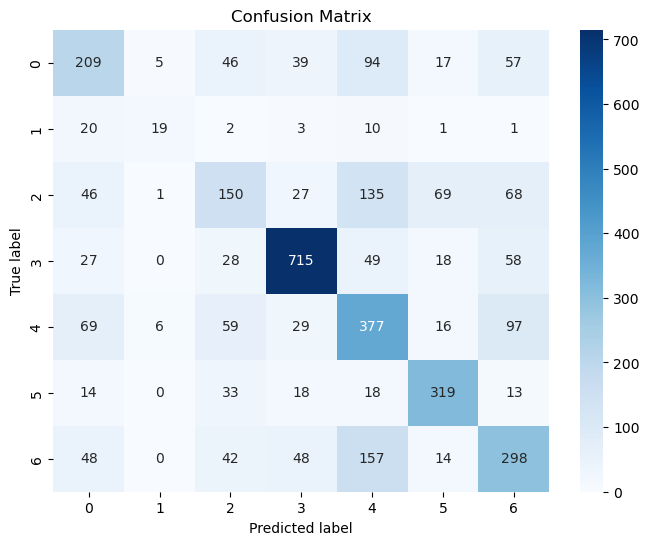

In [20]:
#Confusion Matrix[2]


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and obtained predictions on test data
# Replace these with your actual predictions and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)

y_true = np.argmax(test_y, axis=1)  # Convert one-hot encoded true labels back to categorical

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [21]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

1/1 [==============================] - 0s 26ms/step


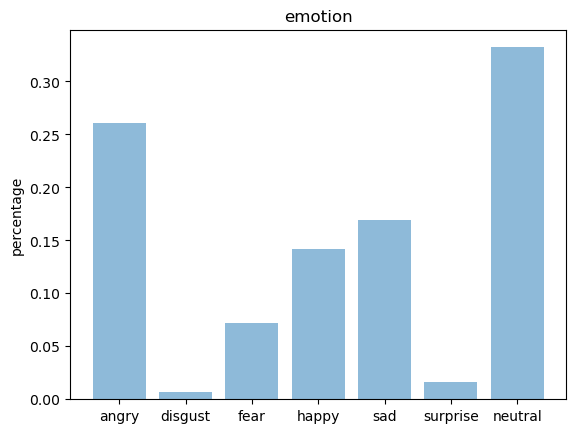

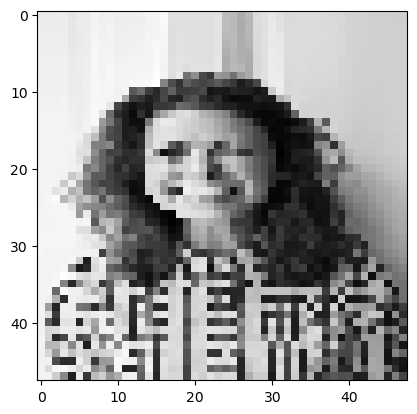

In [22]:
#Testing[2]


from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from matplotlib import pyplot as plt

# Load the image
img_path = "D:/data/EEC/EEC dataset/happyface.png"
img = load_img(img_path, color_mode='grayscale', target_size=(48, 48))

# Convert the image to an array
x = img_to_array(img)
#img = load_img("D:\data\EEC\EEC dataset\happyface.png", grayscale=True, target_size=(48, 48))
#x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

In [1]:
!pip install deepface

  Obtaining dependency information for deepface from https://files.pythonhosted.org/packages/4c/05/3e881f6d3c20d45561ab3c4d8c5c38c500eff4743ad155075c2bcb519a84/deepface-0.0.92-py3-none-any.whl.metadata
  Obtaining dependency information for gdown>=3.10.1 from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for mtcnn>=0.1.0 from https://files.pythonhosted.org/packages/09/d1/2a4269e387edb97484157b872fa8a1953b53dcafbe4842a1967f549ac5ea/mtcnn-0.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for retina-face>=0.0.1 from https://files.pythonhosted.org/packages/84/87/30c5beef6ef3cb60f80f02d3f934b86efda21aca3225f174d127192d43bb/retina_face-0.0.17-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
     ----------------- -------------------- 41.0/88.4 kB 991.0 kB/s eta 0:00:01
     ---------------------

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Load model
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        print("Error: Unable to capture frame from the webcam.")
        break

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break